In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ===========================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ===========================================================================
import warnings
warnings.filterwarnings('ignore')
# Datos
# ===========================================================================

In [32]:
path = "students.csv"
data = pd.read_csv(path, delimiter=';', header=0)
data.head(6)

,Unnamed: 0,student,height,weight,label
0,NaN,1,160,50,Bajo Peso
1,NaN,2,165,55,Bajo Peso
2,NaN,3,170,60,Bajo Peso
3,NaN,4,175,70,Sobrepeso
4,NaN,5,180,75,Sobrepeso
5,NaN,6,185,80,Sobrepeso


[0 0 0 1 1 1]
   height  weight
0     160      50
1     165      55
2     170      60
3     175      70
4     180      75
5     185      80


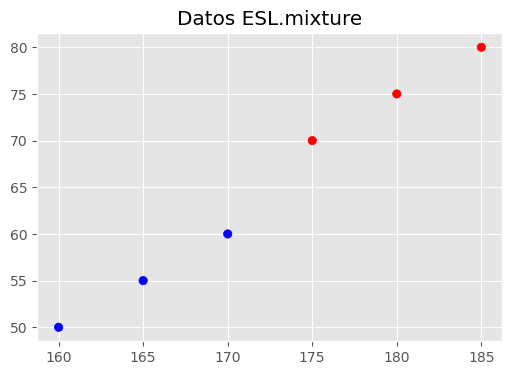

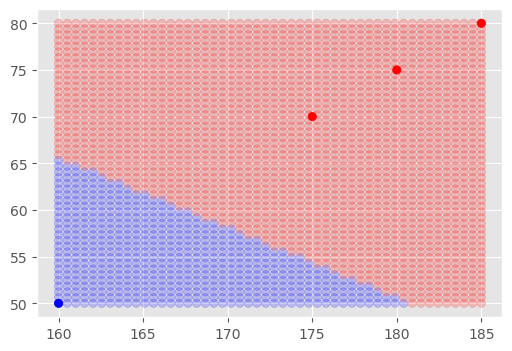

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
labels = np.where(data['label']=='Bajo Peso', 0, 1)
print(labels)
ax.scatter(data['height'],data['weight'], c=labels)
ax.set_title("Datos ESL.mixture")
X = data.drop(columns = ['label',"Unnamed: 0","student"])
print(X)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state = 1234,shuffle = True)
model = SVC(C = 100, kernel = 'linear', random_state=123)
model.fit(X_train, y_train)
x = np.linspace(np.min(X_train.height), np.max(X_train.height), 50)
y = np.linspace(np.min(X_train.weight), np.max(X_train.weight), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T
pred_grid = model.predict(grid)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.height, X_train.weight, c=y_train, alpha = 1)


In [34]:
ax.scatter(
model.support_vectors_[:, 0],
model.support_vectors_[:, 1],
s=200, linewidth=1,
facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
X,
Y,
model.decision_function(grid).reshape(X.shape),
colors = 'k',
levels = [-1, 0, 1],
alpha = 0.5,
linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");
predictions = model.predict(X_test)
predictions


array([1, 0])

In [35]:
accuracy = accuracy_score(
y_true = y_test,
y_pred = predictions,
 normalize = True
)
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 50.0%
